In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import csv

In [296]:
def clean_data(dataframe_placeholder):
    subj_course_split = dataframe_placeholder['subj_course_id'].str.split(expand=True)
    clean = dataframe_placeholder.assign(ten_percent=(round(dataframe_placeholder['total'] * 0.1, 0)).astype(int),
                                         subj=subj_course_split[0],
                                         course_id=subj_course_split[1],
                                         time=pd.to_datetime(dataframe_placeholder['time'], unit='ms'))

    # This removes course series endings such as the 'a' in Cogs 107a to check for certain classes that we want to remove.

    # Dropping specific classes such as cogs 190a or cogs 99
    clean = clean[clean['subj'] == 'COGS']
    depleted = ['87', '99', '160', '190A', '190B', '190C', '190D']
    for i in range(190, 200):
        depleted.append(str(i))
    clean = (clean[clean['course_id'].isin(depleted) == False])
    return clean.drop(['subj_course_id', 'subj'], axis=1)

In [297]:
def combine_df_by_time(df_lists: list):
    clean_datasets = pd.concat(df_lists, ignore_index=True).sort_values('time').reset_index()
    return clean_datasets

In [298]:
def file_paths(folder):
    # ONLY RETURNS FILES WITH DATA INSIDE
    term = []

    for files in os.listdir(folder):
        reader = csv.reader(files)
        num_columns = len(next(reader))  # Get number of columns from the first row
        if files.endswith('.csv') and os.path.getsize(f'{folder}/' + files) > 1000 and len(
                list(reader)[-1]) == num_columns:
            term.append(f'{folder}/' + str(files))
    return term


dtypes = pd.read_csv("C:/Users/ALEX/PycharmProjects/Statistics/raw/enrollment_2022-11-05T20_09_38_WI23.csv").dtypes

In [299]:
clean_data(pd.read_csv('C:/Users/ALEX/PycharmProjects/Statistics/raw/enrollment_2022-11-05T20_09_38_WI23.csv'))['course_id'].unique()

array(['1', '9', '13', '14A', '14B', '17', '18', '100', '101A', '101B',
       '101C', '107A', '107B', '108', '111', '115', '118A', '118C', '123',
       '124', '126', '127', '137', '152', '156', '163', '165', '172',
       '181', '187B', '189'], dtype=object)

In [300]:
def make_clean_df(paths):
    out = []
    for i in paths:
        out.append(clean_data(pd.read_csv(i, dtype=dtypes.to_dict())))
    return out


In [301]:
file_locations = file_paths('C:/Users/ALEX/PycharmProjects/Statistics/raw')

# The Cell Below Will take around 5 minutes to load. It's working, albeit slowly...

In [302]:
a = make_clean_df(file_locations)

In [303]:
winter_joined = combine_df_by_time(a)

In [304]:
### Try to run just this cell if you need to Reload the dataframe
winter_2023 = winter_joined

In [305]:
#winter_2023 = winter_2023.drop('index', axis=1)
winter_2023

,index,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id
0,0,2022-11-06 03:11:08.407,A01,107920,Boyle; Mary E. T.,60,0,60,0,6,1
1,1,2022-11-06 03:11:08.407,A02,107921,Boyle; Mary E. T.,60,0,60,0,6,1
2,2,2022-11-06 03:11:08.407,A03,107922,Boyle; Mary E. T.,60,0,60,0,6,1
3,3,2022-11-06 03:11:08.407,A04,107923,Boyle; Mary E. T.,60,0,60,0,6,1
4,4,2022-11-06 03:11:08.407,A05,107924,Boyle; Mary E. T.,60,0,60,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...
1635471,1635469,2023-02-18 18:55:17.517,A01,100933,Tu; Zhuowen,5,0,26,21,3,181
1635472,1635472,2023-02-18 18:55:17.517,A04,100991,Tu; Zhuowen,4,0,41,37,4,181
1635473,1635474,2023-02-18 18:55:17.945,A02,101092,Kirsh; David Joel,0,0,50,50,5,187B
1635474,1635473,2023-02-18 18:55:17.945,A01,101057,Kirsh; David Joel,0,1,50,53,5,187B


In [306]:
winter_2023 = winter_2023[
(winter_2023['time'] < pd.Timestamp('2023-01-19'))&
(winter_2023['time'] > pd.Timestamp('2022-11-14'))].reset_index().drop(['index', 'level_0'], axis=1)
winter_2023

,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id
0,2022-11-14 00:08:39.148,A01,107920,Boyle; Mary E. T.,0,0,60,60,6,1
1,2022-11-14 00:08:39.148,A02,107921,Boyle; Mary E. T.,0,0,60,60,6,1
2,2022-11-14 00:08:39.148,A03,107922,Boyle; Mary E. T.,0,0,60,60,6,1
3,2022-11-14 00:08:39.148,A04,107923,Boyle; Mary E. T.,10,0,60,50,6,1
4,2022-11-14 00:08:39.148,A05,107924,Boyle; Mary E. T.,14,0,60,46,6,1
...,...,...,...,...,...,...,...,...,...,...
1051253,2023-01-18 23:54:51.643,A03,100977,Tu; Zhuowen,2,0,27,25,3,181
1051254,2023-01-18 23:54:51.643,A04,100991,Tu; Zhuowen,2,0,41,39,4,181
1051255,2023-01-18 23:54:52.090,A01,101057,Kirsh; David Joel,0,3,50,51,5,187B
1051256,2023-01-18 23:54:52.090,A02,101092,Kirsh; David Joel,0,3,50,50,5,187B


In [307]:
winter_2023[(winter_2023['sec_id'] == 107921) & (winter_2023['time'].dt.day == 15) & (winter_2023['time'].dt.month == 11) & (winter_2023['time'].dt.hour == 6)]

,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id
20479,2022-11-15 06:02:26.911,A02,107921,Boyle; Mary E. T.,1,2,60,59,6,1
20585,2022-11-15 06:11:35.206,A02,107921,Boyle; Mary E. T.,1,2,60,59,6,1
20688,2022-11-15 06:20:43.126,A02,107921,Boyle; Mary E. T.,1,2,60,59,6,1
20792,2022-11-15 06:29:50.492,A02,107921,Boyle; Mary E. T.,0,1,60,60,6,1
20896,2022-11-15 06:39:08.395,A02,107921,Boyle; Mary E. T.,0,1,60,60,6,1
21002,2022-11-15 06:48:16.043,A02,107921,Boyle; Mary E. T.,0,1,60,60,6,1
21110,2022-11-15 06:57:23.420,A02,107921,Boyle; Mary E. T.,0,1,60,60,6,1


In [308]:
change = np.array([0])
t = winter_2023[(winter_2023['sec_id'] == 99958)]
for i in range(1,t.shape[0]):
    change = np.append(change, (t.iloc[i]['enrolled_ct'] != t.iloc[i-1]['enrolled_ct']))

In [309]:
winter_2023[(winter_2023['sec_id'] == 99958)]

,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id
7,2022-11-14 00:08:39.581,A03,99958,Shannon; Kyle Michael,39,0,60,21,6,9
112,2022-11-14 00:17:47.437,A03,99958,Shannon; Kyle Michael,39,0,60,21,6,9
217,2022-11-14 00:26:55.028,A03,99958,Shannon; Kyle Michael,39,0,60,21,6,9
322,2022-11-14 00:36:02.849,A03,99958,Shannon; Kyle Michael,39,0,60,21,6,9
429,2022-11-14 00:45:26.655,A03,99958,Shannon; Kyle Michael,39,0,60,21,6,9
...,...,...,...,...,...,...,...,...,...,...
1050737,2023-01-18 23:14:10.126,A03,99958,Shannon; Kyle Michael,0,7,70,70,7,9
1050842,2023-01-18 23:24:25.955,A03,99958,Shannon; Kyle Michael,0,7,70,70,7,9
1050949,2023-01-18 23:34:30.877,A03,99958,Shannon; Kyle Michael,0,7,70,70,7,9
1051055,2023-01-18 23:44:33.936,A03,99958,Shannon; Kyle Michael,0,7,70,70,7,9


In [310]:
t = t.assign(change = change)
changes = t[t['change'] == 1]
changes

,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id,change
13134,2022-11-14 19:19:23.181,A03,99958,Shannon; Kyle Michael,38,0,60,22,6,9,1
13449,2022-11-14 19:47:02.833,A03,99958,Shannon; Kyle Michael,37,0,60,23,6,9,1
14289,2022-11-14 21:00:36.169,A03,99958,Shannon; Kyle Michael,36,0,60,24,6,9,1
14812,2022-11-14 21:46:42.206,A03,99958,Shannon; Kyle Michael,35,0,60,25,6,9,1
14919,2022-11-14 21:55:52.699,A03,99958,Shannon; Kyle Michael,36,0,60,24,6,9,1
15024,2022-11-14 22:05:15.671,A03,99958,Shannon; Kyle Michael,35,0,60,25,6,9,1
18804,2022-11-15 03:36:00.743,A03,99958,Shannon; Kyle Michael,34,0,60,26,6,9,1
19224,2022-11-15 04:12:33.553,A03,99958,Shannon; Kyle Michael,33,0,60,27,6,9,1
19434,2022-11-15 04:30:59.871,A03,99958,Shannon; Kyle Michael,34,0,60,26,6,9,1
28989,2022-11-15 18:34:20.858,A03,99958,Shannon; Kyle Michael,33,0,60,27,6,9,1


In [311]:
total = 0
for i in range(0, changes.shape[0]):
    if changes.iloc[i]['available'] < changes.iloc[i-1]['available']:
        total = total + changes.iloc[i-1]['available']
total

764

We Are Removing Cogs 137 because they increased the class size.

In [312]:
def students_from_waitlist(section):
    change = np.array([0])
    t = winter_2023[(winter_2023['sec_id'] == section) & (winter_2023['waitlist'] > 0)]
    for i in range(1,t.shape[0]):
        change = np.append(change, (t.iloc[i]['enrolled_ct'] != t.iloc[i-1]['enrolled_ct']))
    t = t.assign(change = change)
    changes = t[t['change'] == 1]
    total = 0
    for i in range(0, changes.shape[0]):
        if changes.iloc[i]['available'] < changes.iloc[i-1]['available']:
            total = total + changes.iloc[i-1]['available']
    
    return total

In [313]:
sections = winter_2023['sec_id'].unique()
sections

array([107920, 107921, 107922, 107923, 107924, 107925, 107926,  99958,
        99956,  99957,  99966,  99967,  99968,  99969,  99975,  99971,
        99972,  99973,  99974,  99979,  99977,  99978,  99981,  99982,
        99983,  99984,  99985,  99986,  99992,  99996,  99995,  99994,
        99993,  99991,  99990,  99989,  99988, 107928, 107929, 107930,
       107931, 107932, 100067, 100066, 100065, 100064, 100056, 100055,
       107417, 107418, 107419, 107420, 107421, 100126, 100130, 100304,
       100294, 100292, 100285, 100284, 100291, 107423, 107424, 107425,
       107426, 100341, 100343, 100330, 100340, 100327, 100325, 100328,
       100346, 100348, 100358, 100361, 115287, 115288, 115289, 115290,
       100388, 100412, 100410, 100403, 100404, 100409, 100422, 100425,
       100440, 100428, 100430, 115285, 117933, 100593, 100596, 100598,
       107934, 107935, 100933, 100934, 100977, 100991, 101057, 101092,
       101106, 161544], dtype=int64)

In [314]:
by_class = []
for i in winter_2023['sec_id'].unique():
    by_class.append([winter_2023[winter_2023['sec_id'] == i].iloc[0].course_id, winter_2023[winter_2023['sec_id'] == i].iloc[0].sec_code])
print(by_class)

[['1', 'A01'], ['1', 'A02'], ['1', 'A03'], ['1', 'A04'], ['1', 'A05'], ['1', 'A06'], ['1', 'A07'], ['9', 'A03'], ['9', 'A01'], ['9', 'A02'], ['13', 'A01'], ['13', 'A02'], ['13', 'A03'], ['13', 'A04'], ['14A', 'A05'], ['14A', 'A01'], ['14A', 'A02'], ['14A', 'A03'], ['14A', 'A04'], ['14B', 'A03'], ['14B', 'A01'], ['14B', 'A02'], ['17', 'A01'], ['17', 'A02'], ['17', 'A03'], ['17', 'A04'], ['17', 'A05'], ['17', 'A06'], ['18', 'A05'], ['18', 'A09'], ['18', 'A08'], ['18', 'A07'], ['18', 'A06'], ['18', 'A04'], ['18', 'A03'], ['18', 'A02'], ['18', 'A01'], ['100', 'A01'], ['100', 'A02'], ['100', 'A03'], ['100', 'A04'], ['100', 'A05'], ['101A', 'A06'], ['101A', 'A05'], ['101A', 'A04'], ['101A', 'A03'], ['101A', 'A02'], ['101A', 'A01'], ['101B', 'A01'], ['101B', 'A02'], ['101B', 'A03'], ['101B', 'A04'], ['101B', 'A05'], ['101C', 'A01'], ['101C', 'A02'], ['107A', 'A06'], ['107A', 'A05'], ['107A', 'A04'], ['107A', 'A02'], ['107A', 'A01'], ['107A', 'A03'], ['107B', 'A01'], ['107B', 'A02'], ['107B', 

In [315]:
people_who_get_in = []
for i in sections:
    output = students_from_waitlist(i)
    people_who_get_in.append(([i, output]))

In [316]:
key = {i[0]:i[1] for i in people_who_get_in}

In [317]:
winter23 = winter_2023.assign(actual = winter_2023['sec_id'].map(key)) 

In [318]:
winter23

,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id,actual
0,2022-11-14 00:08:39.148,A01,107920,Boyle; Mary E. T.,0,0,60,60,6,1,5
1,2022-11-14 00:08:39.148,A02,107921,Boyle; Mary E. T.,0,0,60,60,6,1,8
2,2022-11-14 00:08:39.148,A03,107922,Boyle; Mary E. T.,0,0,60,60,6,1,6
3,2022-11-14 00:08:39.148,A04,107923,Boyle; Mary E. T.,10,0,60,50,6,1,0
4,2022-11-14 00:08:39.148,A05,107924,Boyle; Mary E. T.,14,0,60,46,6,1,5
...,...,...,...,...,...,...,...,...,...,...,...
1051253,2023-01-18 23:54:51.643,A03,100977,Tu; Zhuowen,2,0,27,25,3,181,1
1051254,2023-01-18 23:54:51.643,A04,100991,Tu; Zhuowen,2,0,41,39,4,181,0
1051255,2023-01-18 23:54:52.090,A01,101057,Kirsh; David Joel,0,3,50,51,5,187B,2
1051256,2023-01-18 23:54:52.090,A02,101092,Kirsh; David Joel,0,3,50,50,5,187B,6


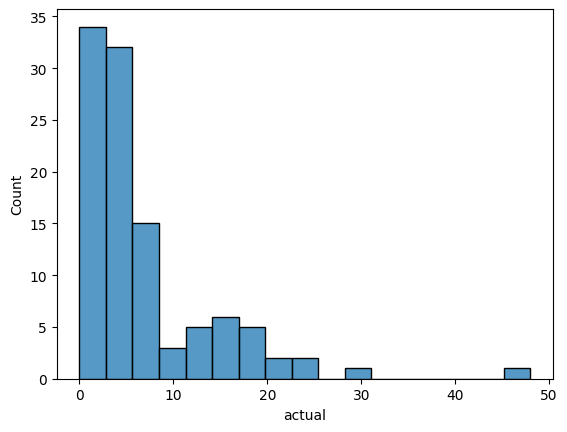

In [319]:
sns.histplot(data=winter23.groupby('sec_id').max(), x='actual')
plt.show()

In [320]:
winter23.groupby('sec_id').max().sort_values(by='actual', ascending=False)
#winter23[winter23.sec_id ==161544].total.unique()

,time,sec_code,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id,actual
sec_id,,,,,,,,,,
115285,2023-01-18 23:54:48.502,A01,Ellis; Shannon Elizabeth,36,37,70,71,7,137,48
161544,2023-01-18 23:54:38.093,A04,Shannon; Kyle Michael,9,10,40,40,4,9,29
107930,2023-01-18 23:54:41.699,A03,Staff,39,7,67,67,7,100,24
99982,2023-01-18 23:54:39.895,A02,Johnson; Christine M.,38,15,70,73,7,17,23
107929,2023-01-18 23:54:41.699,A02,Staff,39,8,67,67,7,100,20
...,...,...,...,...,...,...,...,...,...,...
100934,2023-01-18 23:54:51.643,A02,Tu; Zhuowen,38,1,50,27,5,181,0
100991,2023-01-18 23:54:51.643,A04,Tu; Zhuowen,29,0,50,41,5,181,0
107421,2023-01-18 23:54:42.598,A05,Hoffman; Drew Ellen,57,0,60,60,6,101B,0


In [321]:
# winter23.groupby('sec_id').nunique()#.total.unique()
class_size_changes = winter23.groupby('sec_id').nunique().reset_index()
class_size_changes = class_size_changes.get(['sec_id', 'total'])
change_class = {i[0]:(i[1] - 1) for i in np.array(class_size_changes)}
winter23 = winter23.assign(size_change = winter23['sec_id'].map(change_class))
winter23


,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id,actual,size_change
0,2022-11-14 00:08:39.148,A01,107920,Boyle; Mary E. T.,0,0,60,60,6,1,5,0
1,2022-11-14 00:08:39.148,A02,107921,Boyle; Mary E. T.,0,0,60,60,6,1,8,0
2,2022-11-14 00:08:39.148,A03,107922,Boyle; Mary E. T.,0,0,60,60,6,1,6,0
3,2022-11-14 00:08:39.148,A04,107923,Boyle; Mary E. T.,10,0,60,50,6,1,0,0
4,2022-11-14 00:08:39.148,A05,107924,Boyle; Mary E. T.,14,0,60,46,6,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1051253,2023-01-18 23:54:51.643,A03,100977,Tu; Zhuowen,2,0,27,25,3,181,1,2
1051254,2023-01-18 23:54:51.643,A04,100991,Tu; Zhuowen,2,0,41,39,4,181,0,1
1051255,2023-01-18 23:54:52.090,A01,101057,Kirsh; David Joel,0,3,50,51,5,187B,2,0
1051256,2023-01-18 23:54:52.090,A02,101092,Kirsh; David Joel,0,3,50,50,5,187B,6,0


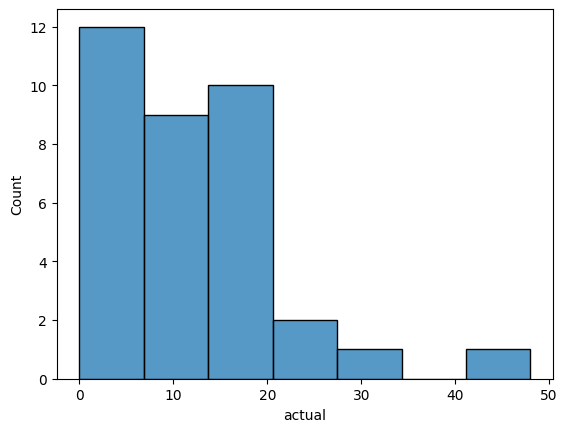

In [322]:
class_that_dont_increase = winter23[winter23.size_change == 1]

sns.histplot(data=class_that_dont_increase.groupby('sec_id').max(), x='actual')
plt.show()

In [323]:
winter23 = winter23.rename({'actual':'off_waitlist'}, axis=1)
winter23.to_csv(r"C:\Users\ALEX\Group027-FA24/time_series.csv")

In [324]:
winter_sections = winter23.drop(['time', 'available', 'waitlist', 'enrolled_ct'], axis=1)
winter_sections = winter_sections.groupby('sec_id').max()
winter_sections

,sec_code,prof,total,ten_percent,course_id,off_waitlist,size_change
sec_id,,,,,,,
99956,A01,Shannon; Kyle Michael,70,7,9,3,0
99957,A02,Shannon; Kyle Michael,70,7,9,18,1
99958,A03,Shannon; Kyle Michael,70,7,9,15,1
99966,A01,Johnson; Christine M.,65,6,13,3,1
99967,A02,Johnson; Christine M.,65,6,13,4,1
...,...,...,...,...,...,...,...
115288,A02,Fleischer; Jason G,60,6,118A,0,0
115289,A03,Fleischer; Jason G,60,6,118A,0,0
115290,A04,Fleischer; Jason G,60,6,118A,0,0


In [325]:
winter_sections.to_csv(r"C:\Users\ALEX\Group027-FA24/winter_summary.csv")

# What will we need for our clean dataset?

1. class size
2. time
3. Professor
4. The course id
5. The section code
6. Section_ID
7. Actual number of people that Dropped
8. Total number of seats
9. Whether the class size changed.

Lets also add another dataset with 1 row per section without the time.

[course_id, sec_id, section_code, prof, actual, size_change, total, ten_percent]

### Graphs We might include

1. Class size histogram
2. timeline of when Waitlist opens
3. linegraph of the timeline proportion of seats filled
4. Pie chart / barchart of whether class size changes.